# Imports

In [39]:
import numpy as np 
import matplotlib.pyplot as plt

# Global functions

In [40]:
def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))

def lorentz(x, mu, sigma):
    return 1/(np.pi*sigma*(1+((x-mu)/sigma)**2))

def plummer(x, mu, sigma):
    return 3/(np.pi*sigma**3*(1+(x-mu)**2/sigma**2)**(5/2))

def sigmoid(x, mu, sigma):
    return 1/(1+np.exp(-(x-mu)/sigma))

def transmission(T, d):
    return np.exp(-T*d)

def doppler(vs,v0):
    global C, F
    return (C+v0) / (C-vs) * F


# Global constants

In [41]:
FREQ_STEPS = 5
SPACE_STEPS = 5
X, Y, Z = np.meshgrid(
    np.linspace(-1, 1, SPACE_STEPS),
    np.linspace(-1, 1, SPACE_STEPS),
    np.linspace(-1, 1, SPACE_STEPS)
)
F = np.linspace(0,1,FREQ_STEPS)
C = 1 # speed of light

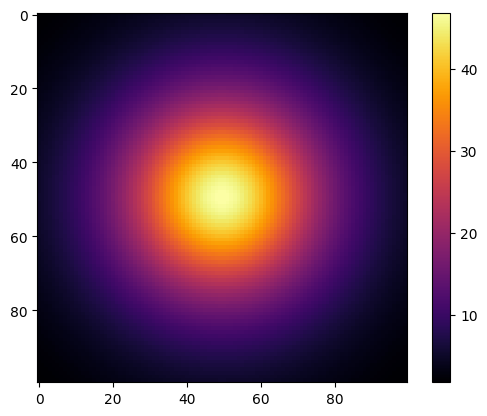

In [42]:
core = plummer(np.sqrt(X**2+Y**2+Z**2), 0, 0.75)
core /= np.max(core)

plt.imshow(np.sum(core, axis=2), cmap='inferno')
plt.colorbar()
plt.show()

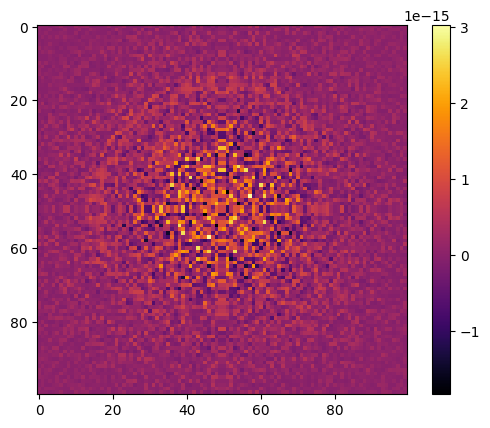

In [43]:
vel = np.gradient(core, axis=2)
vel /= np.max(vel)

plt.imshow(np.sum(vel, axis=2), cmap='inferno')
plt.colorbar()
plt.show()

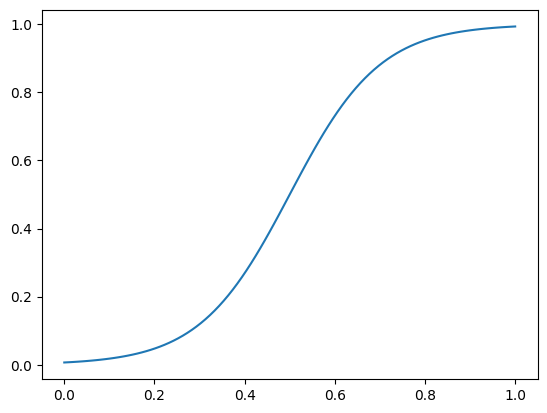

In [44]:
plt.plot(np.linspace(0,1,100), sigmoid(np.linspace(0,1,100), 0.5, 0.1))
plt.show()

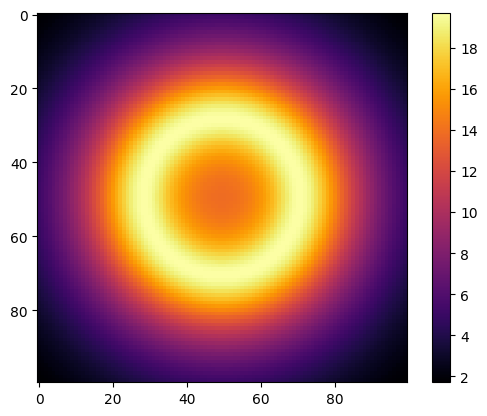

In [45]:
CO_gaz = core * (1-sigmoid(core, 0.5, 0.1))

plt.imshow(np.sum(CO_gaz, axis=2), cmap='inferno')
plt.colorbar()
plt.show()

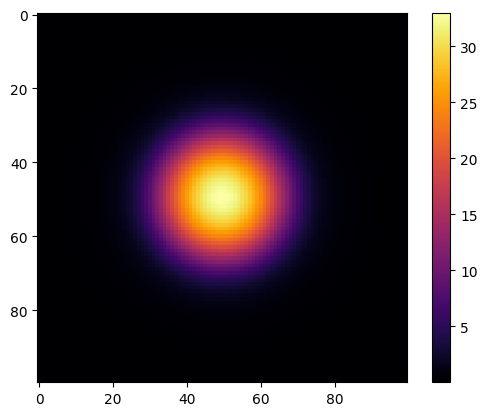

In [46]:
N2_gaz = core * sigmoid(core, 0.5, 0.1)

plt.imshow(np.sum(N2_gaz, axis=2), cmap='inferno')
plt.colorbar()
plt.show()

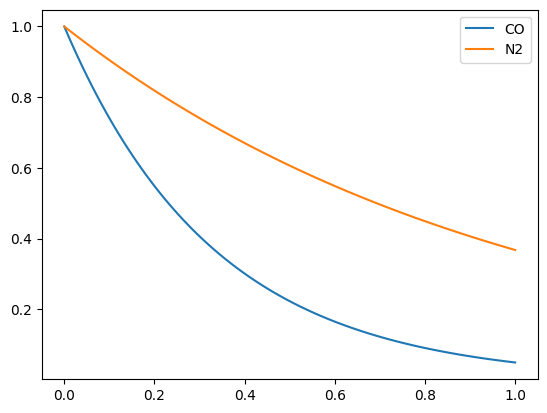

In [47]:
T_CO = 3
T_N2 = 1

plt.plot(np.linspace(0,1,100), transmission(T_CO, np.linspace(0,1,100)), label='CO')
plt.plot(np.linspace(0,1,100), transmission(T_N2, np.linspace(0,1,100)), label='N2')
plt.legend()
plt.show()

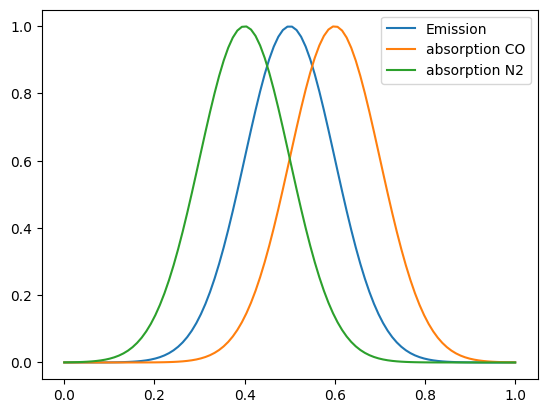

In [48]:
emission = gauss(np.linspace(0,1,100), 0.5, 0.1)

absorption_CO = gauss(np.linspace(0,1,100), 0.6, 0.1)
absorption_N2 = gauss(np.linspace(0,1,100), 0.4, 0.1)

plt.plot(np.linspace(0,1,100), emission, label='Emission')
plt.plot(np.linspace(0,1,100), absorption_CO, label='absorption CO')
plt.plot(np.linspace(0,1,100), absorption_N2, label='absorption N2')
plt.legend()
plt.show()

In [54]:
spectra_func = np.zeros((SPACE_STEPS, SPACE_STEPS, SPACE_STEPS), dtype=object)
spectra_cube = np.zeros((SPACE_STEPS, SPACE_STEPS, FREQ_STEPS), dtype=object)

for x in range(SPACE_STEPS):
    for y in range(SPACE_STEPS):
        for z in range(SPACE_STEPS):

            if z == 0:
                spectra_func[x,y,z] = lambda f: gauss(f, 0.5, 0.1) # New emission

            else:
                spectra_func[x,y,z] = lambda f: (
                    spectra_func[x,y,z-1](doppler(vel[x,y,z-1], vel[x,y,z])) # shifted previous emissions
                    * transmission(T_CO, CO_gaz[x,y,z]) * absorption_CO # CO absorption
                    * transmission(T_N2, N2_gaz[x,y,z]) * absorption_N2 # N2 absorption
                    * gauss(f, 0.5, 0.1) # New emission
                )
        
        spectra_cube[x,y,:] = spectra_func[x,y,z](doppler(vel[x,y,-1], 0))

plt.imshow(np.sum(spectra_cube[:,:,FREQ_STEPS//2]), cmap='inferno')

RecursionError: maximum recursion depth exceeded